In [87]:
import pandas as pd                           # Pandas is a open source data analysis library, easy-to-use data structures and data analysis tools.
import numpy as np                            # Numpy has mathematical functions, adding support for large, multi-dimensional arrays and matrices 
import matplotlib.pyplot as plt               # Plotting library represents 2d graphiics in python
import seaborn as sns                         # Seaborn is a Python data visualization library based on matplotlib(Statistical)

data = pd.read_csv('https://raw.githubusercontent.com/Premnath1/Diabetes-Prediction/master/diabetes.csv')

dt = pd.DataFrame(data)                       # Data is aligned into tabular manner

print(dt.info())                              #summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [88]:
print(dt.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


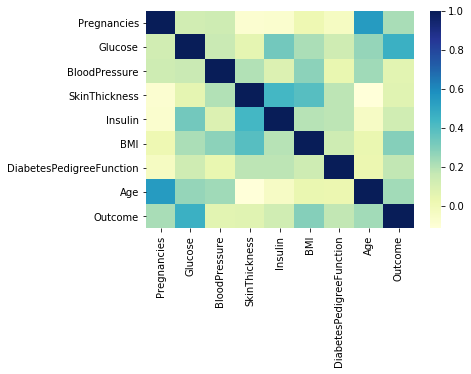

In [89]:
# Heatmap - gives coloured representation of data
# corr() - gives the pair-wise correlation of dataframe
# cmap - color of graph should be mentioned here

sns.heatmap(dt.corr(),cmap = 'YlGnBu')

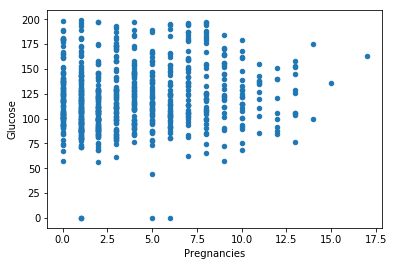

In [90]:
dt.plot.scatter(x = "Pregnancies", y = "Glucose")

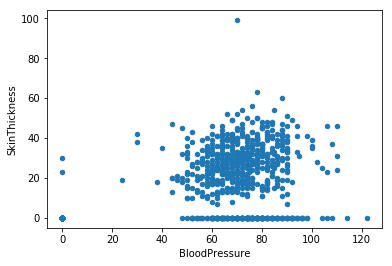

In [91]:
dt.plot.scatter(x='BloodPressure',y='SkinThickness')

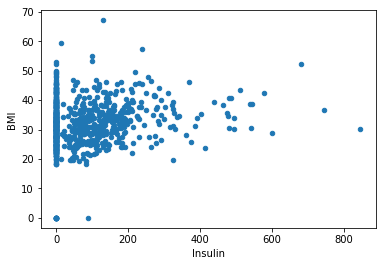

In [92]:
dt.plot.scatter(x='Insulin',y='BMI')

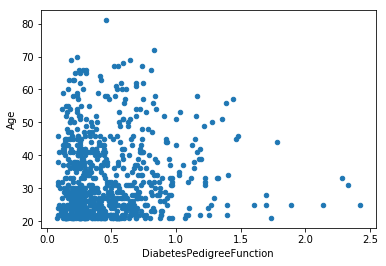

In [93]:
dt.plot.scatter(x='DiabetesPedigreeFunction',y='Age')

In [94]:
# Preprocessing - raw data into clean dataset
# axis : {0 or ‘rows’, 1 or ‘columns’}

dt=dt.drop(dt.index[dt.Pregnancies>=11.5],axis=0)
dt=dt.drop(dt.index[dt.Glucose>=185],axis=0)
dt=dt.drop(dt.index[dt.BloodPressure>=92],axis=0)
dt=dt.drop(dt.index[dt.BloodPressure<=37],axis=0)
dt=dt.drop(dt.index[dt.BMI>=45],axis=0)
dt=dt.drop(dt.index[dt.DiabetesPedigreeFunction>=1.2],axis=0)

print(dt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 594 non-null int64
Glucose                     594 non-null int64
BloodPressure               594 non-null int64
SkinThickness               594 non-null int64
Insulin                     594 non-null int64
BMI                         594 non-null float64
DiabetesPedigreeFunction    594 non-null float64
Age                         594 non-null int64
Outcome                     594 non-null int64
dtypes: float64(2), int64(7)
memory usage: 46.4 KB
None


In [95]:
#h={'Outcome':{1:'Yes',0:'No'}}
print(dt.head(10))

x = pd.DataFrame(dt)
x = x.drop(['Outcome'],axis=1)
print(x.info())

y = dt['Outcome']
y.head(10)

# Train data = 80% , Test data = 20 %
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50        1
1             1       85             66  ...                     0.351   31        0
2             8      183             64  ...                     0.672   32        1
3             1       89             66  ...                     0.167   21        0
5             5      116             74  ...                     0.201   30        0
6             3       78             50  ...                     0.248   26        1
11           10      168             74  ...                     0.537   34        1
14            5      166             72  ...                     0.587   51        1
17            7      107             74  ...                     0.254   31        1
19            1      115             70  ...                     0.529   32        1

[10 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int6

In [96]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_p = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
  print(*line)

0.7563025210084033
Pr 0 Pr 1
73 15
14 17


In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
y_p = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)

0.7647058823529411


In [98]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,y_train)
y_p = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)


0.773109243697479


In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_p = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)

0.7647058823529411


In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_p = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)

classifier.predict_proba([[3,78,50,32,88,31.0,0.248,26]])

0.7815126050420168


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.85841331, 0.14158669]])

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print(acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
  print(*line)
  
# From the following Algorithms we found that GradientBoostingClassifier has more Accuracy
List = [[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]]
k = classifier.predict(List)
print(k)


0.7983193277310925
Pr 0 Pr 1
78 10
14 17
[1]
